# Differencing example

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
CHART_HEIGHT = 2

In [3]:
df = pd.read_csv("./data/DailyDelhiClimateTrain.csv").set_index("date")
df.index = pd.to_datetime(df.index)
df.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [4]:
def plot_anomalies(df, colname, start, end, k=3.0):
    x = df.loc[start:end, colname]
    x_ = (x - x.shift())[1:]
    p75 = np.quantile(x_, 0.75)
    p25 = np.quantile(x_, 0.25)
    iqr = p75 - p25
    upper = p75 + k * iqr
    lower = p25 - k * iqr
    
    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 2*CHART_HEIGHT), tight_layout=True)
    ax[0].plot(x)
    ax[1].plot(x_)
    ax[1].axhline(upper, color="r", linestyle="--")
    ax[1].axhline(lower, color="r", linestyle="--")
    plt.show()

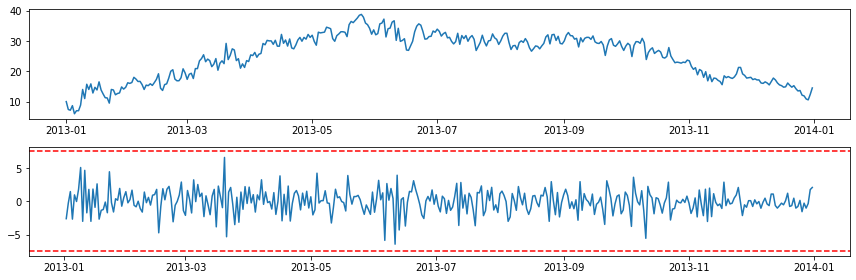

In [9]:
plot_anomalies(df, "meantemp", "2013-01-01", "2013-12-31")

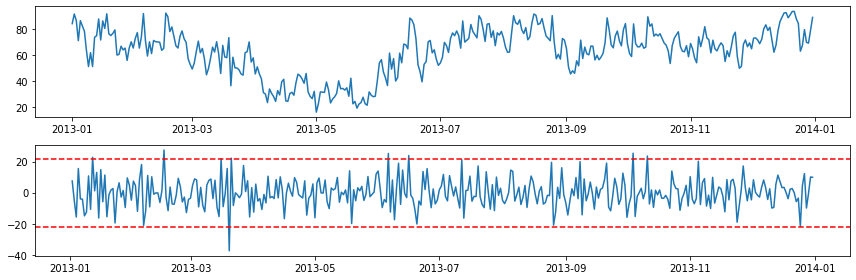

In [10]:
plot_anomalies(df, "humidity", "2013-01-01", "2013-12-31", k=1.5)

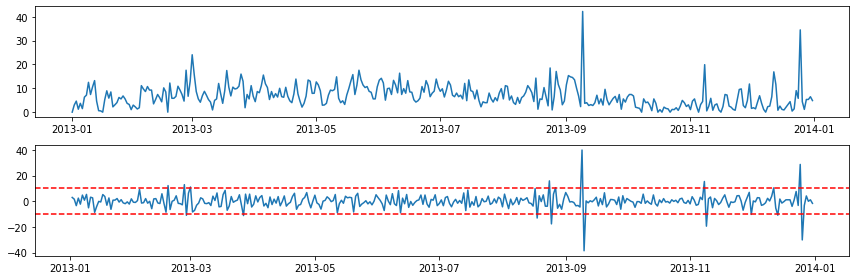

In [11]:
plot_anomalies(df, "wind_speed", "2013-01-01", "2013-12-31", k=1.5)

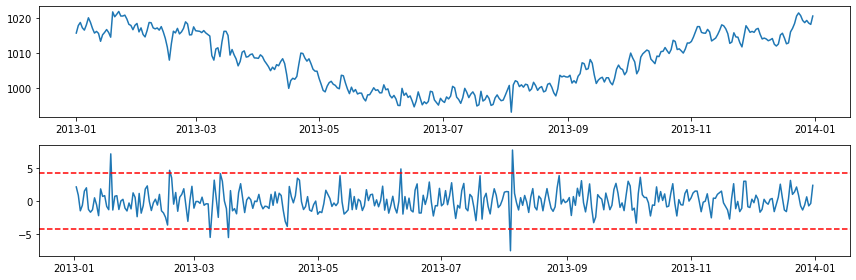

In [12]:
plot_anomalies(df, "meanpressure", "2013-01-01", "2013-12-31", k=1.5)